## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

### Carga de datos desde GitHub

In [18]:
import os
import requests
import pandas as pd
import base64
from io import StringIO
from dotenv import load_dotenv

# 1️⃣ Cargar las variables desde .env
load_dotenv()

# 2️⃣ Leer tu token de entorno
token = os.getenv("GITHUB_TOKEN")

# 3️⃣ Definir la URL de tu archivo (usando la API de GitHub)
url = "https://api.github.com/repos/apachecob/datascience/contents/costumers.csv"

# 4️⃣ Solicitar el archivo con autenticación
headers = {"Authorization": f"token {token}"}
response = requests.get(url, headers=headers)
response.raise_for_status()

# 5️⃣ Decodificar el contenido base64
content = base64.b64decode(response.json()["content"]).decode("utf-8")

# 6️⃣ Convertir a DataFrame
df = pd.read_csv(StringIO(content))
df.head()


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


### Funciones

In [20]:
#  Función para shape, columns, info, describe, nulos y head
import pandas as pd

def resumen_df(df, filas=5):
    print("📐 Shape (filas, columnas):", df.shape)

    print("\n🧾 Columnas:")
    print(df.columns.tolist())

    print("\nℹ️ Info del DataFrame:")
    df.info()

    print("\n📊 Descripción estadística (include='all'):")
    display(df.describe(include="all").transpose())

    print("\n🚨 Valores nulos por columna:")
    display(df.isnull().sum())

    print(f"\n👀 Primeras {filas} filas:")
    display(df.head(filas))


## EDA

### **Datos, Columnas, Nulos, Outliers, Tratamiento**

In [21]:
resumen_df(df)

📐 Shape (filas, columnas): (500, 6)

🧾 Columnas:
['Salario', 'Credito_tipo_1', 'Credito_tipo_2', 'Limite_TC', 'Tiempo_cliente', 'Producto_ofrecido']

ℹ️ Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB

📊 Descripción estadística (include='all'):


,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00



🚨 Valores nulos por columna:


Salario              0
Credito_tipo_1       0
Credito_tipo_2       0
Limite_TC            0
Tiempo_cliente       0
Producto_ofrecido    0
dtype: int64


👀 Primeras 5 filas:


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


Conclusiones preliminares:
- No se observan valores nulos
- La diferencia entre mínimos y máximos de las columnas "Salario" y "Limite_TC" son importantes
- Adicional al punto anterior, llama la atención la presencia de valores negativos en las columnas mencionadas **(en esta versión del notebook no se van a tratar)**
- Tal como se menciona en el enunciado, se detectan columnas con valores booleanos ("Credito_tipo_1", "Credito_tipo_2", "Producto_ofrecido")
- La magnitud entre las columnas "Salario", "Limite_TC" y "Tiempo_cliente" es importante

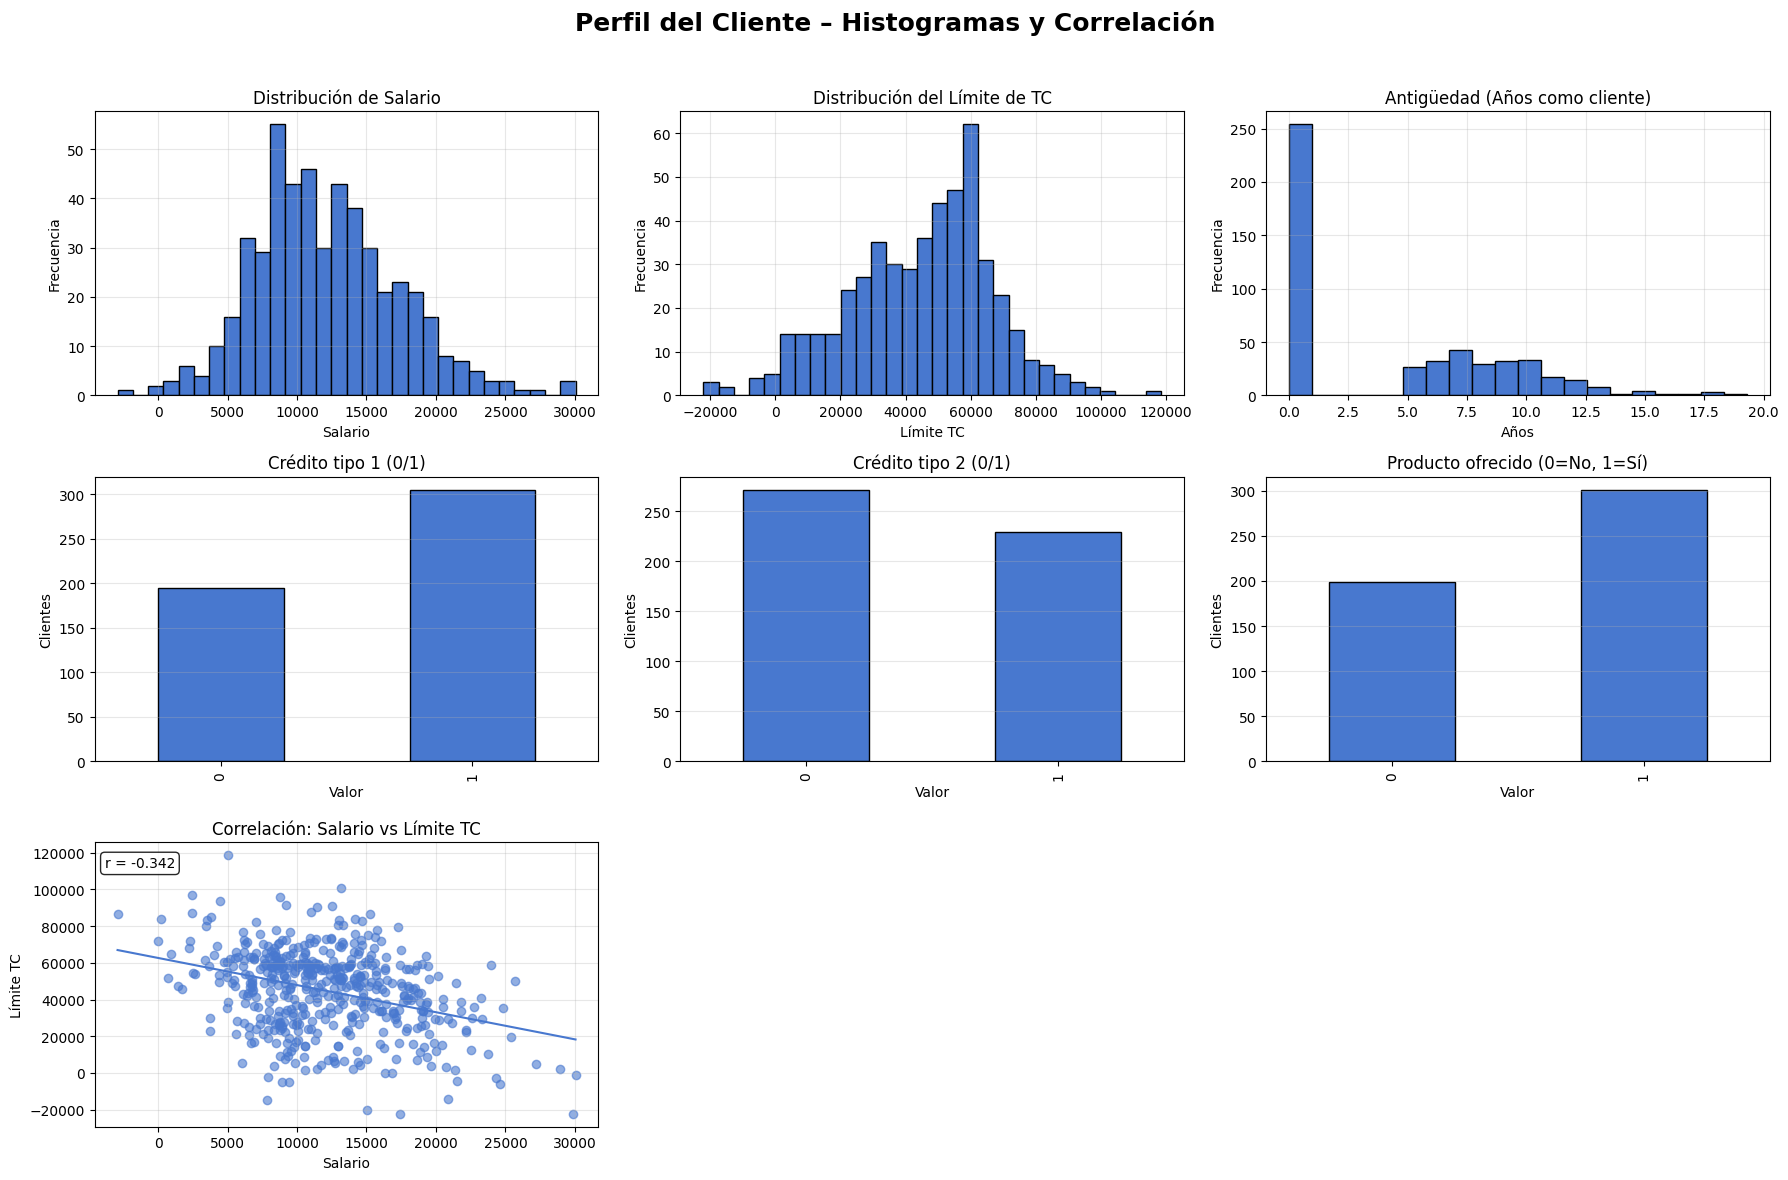

Correlación de Pearson (Salario vs Límite_TC): r = -0.342


In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Perfil del Cliente – Histogramas y Correlación', fontsize=18, fontweight='bold')

# 1) Salario
ax = axes[0, 0]
ax.hist(df['Salario'], bins=30, edgecolor='black')
ax.set_title('Distribución de Salario')
ax.set_xlabel('Salario')
ax.set_ylabel('Frecuencia')
ax.grid(alpha=0.3)

# 2) Límite de TC
ax = axes[0, 1]
ax.hist(df['Limite_TC'], bins=30, edgecolor='black')
ax.set_title('Distribución del Límite de TC')
ax.set_xlabel('Límite TC')
ax.set_ylabel('Frecuencia')
ax.grid(alpha=0.3)

# 3) Tiempo cliente
ax = axes[0, 2]
ax.hist(df['Tiempo_cliente'], bins=20, edgecolor='black')
ax.set_title('Antigüedad (Años como cliente)')
ax.set_xlabel('Años')
ax.set_ylabel('Frecuencia')
ax.grid(alpha=0.3)

# 4) Crédito tipo 1 (barras)
ax = axes[1, 0]
(df['Credito_tipo_1']
 .value_counts()
 .sort_index()
 .plot(kind='bar', ax=ax, edgecolor='black'))
ax.set_title('Crédito tipo 1 (0/1)')
ax.set_xlabel('Valor')
ax.set_ylabel('Clientes')
ax.grid(axis='y', alpha=0.3)

# 5) Crédito tipo 2 (barras) – el que faltaba
ax = axes[1, 1]
(df['Credito_tipo_2']
 .value_counts()
 .sort_index()
 .plot(kind='bar', ax=ax, edgecolor='black'))
ax.set_title('Crédito tipo 2 (0/1)')
ax.set_xlabel('Valor')
ax.set_ylabel('Clientes')
ax.grid(axis='y', alpha=0.3)

# 6) Producto ofrecido (barras)
ax = axes[1, 2]
(df['Producto_ofrecido']
 .value_counts()
 .sort_index()
 .plot(kind='bar', ax=ax, edgecolor='black'))
ax.set_title('Producto ofrecido (0=No, 1=Sí)')
ax.set_xlabel('Valor')
ax.set_ylabel('Clientes')
ax.grid(axis='y', alpha=0.3)

# 7) Correlación Pearson: Salario vs Límite_TC (dispersión + recta)
ax = axes[2, 0]
x = df['Salario'].values
y = df['Limite_TC'].values
ax.scatter(x, y, alpha=0.6)
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
ax.plot(x_line, m*x_line + b)
r = np.corrcoef(x, y)[0, 1]
ax.set_title('Correlación: Salario vs Límite TC')
ax.set_xlabel('Salario')
ax.set_ylabel('Límite TC')
ax.grid(alpha=0.3)
ax.text(0.02, 0.95, f"r = {r:.3f}",
        transform=ax.transAxes, ha='left', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.85))

# 8–9) espacios vacíos (ocultos) para mantener 3x3
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"Correlación de Pearson (Salario vs Límite_TC): r = {r:.3f}")


Conclusiones adicionales:
- A partir de los histogramas se observa la presencia de valores atípicos en las variables **Salario**, **Límite_TC** y **Tiempo_cliente**. En esta versión del análisis dichos valores no serán tratados
- Además, se identifica una **correlación negativa leve** entre **Salario** y **Límite_TC**, lo que indica que, a mayor salario, el límite de crédito tiende a disminuir ligeramente.


### Escalado

Antes de aplicar los algoritmos de **K-Means** y **PCA**, se realizó un proceso de **estandarización** de las variables mediante el método **StandardScaler**, el cual transforma los datos para que cada característica tenga una media igual a 0 y una desviación estándar igual a 1.  
Este procedimiento garantiza que todas las variables contribuyan de manera equitativa al proceso de agrupamiento, evitando que aquellas con escalas mayores dominen el análisis.


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

### Método del codo

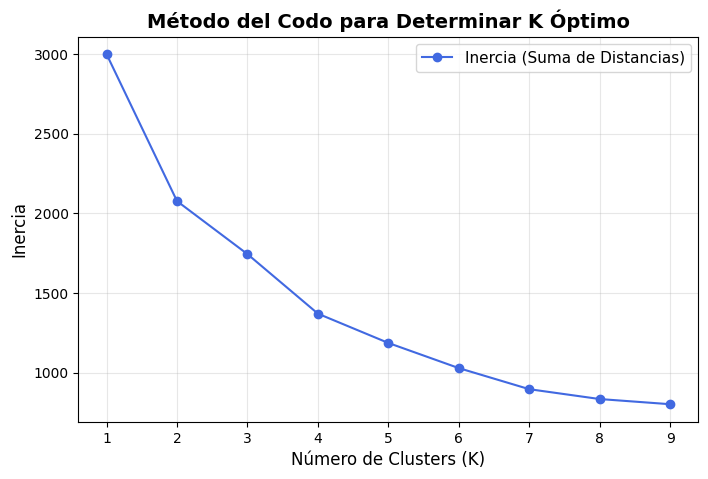

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Gráfico mejorado
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o-', color='royalblue', label='Inercia (Suma de Distancias)')
plt.title('Método del Codo para Determinar K Óptimo', fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.xticks(K)
plt.grid(alpha=0.3)
plt.legend(loc='best', fontsize=11)
plt.show()


Según el gráfico del método del codo, se observa un punto de inflexión en **K = 4**, donde la reducción de la inercia comienza a ser menos significativa.  
Por este motivo, se selecciona **K = 4** como el número óptimo de clusters para continuar con el análisis.


### KMeans

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,cluster
0,22572.91,1,0,30136.74,0.0,1,3
1,10609.64,1,1,53623.94,0.0,1,2
2,10079.48,0,1,18135.44,0.0,0,1
3,13871.35,1,0,30831.75,0.0,1,3
4,6541.46,0,1,20626.23,0.0,0,1


In [26]:
df['cluster'].value_counts()

cluster
0    160
2    144
3    124
1     72
Name: count, dtype: int64

Se aplicó el algoritmo **K-Means** con **K = 4**, asignando a cada cliente un número de cluster según la similitud de sus características.  
La distribución resultante muestra que los grupos son de tamaños relativamente equilibrados, lo que indica una segmentación adecuada de la base de clientes.



### Análisis de componentes principales (PCA)


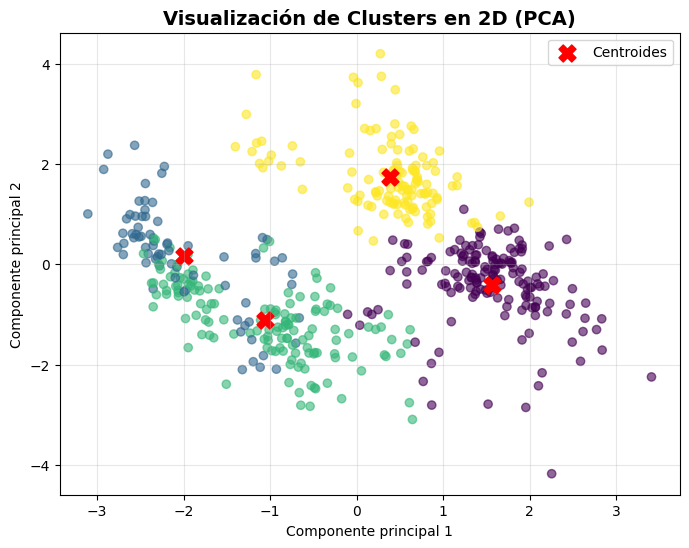

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === PCA a 2 componentes ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === DataFrame con resultados y clusters ===
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = df['cluster']

# === Calcular centroides proyectados al plano PCA ===
centroides_orig = kmeans.cluster_centers_
centroides_pca = pca.transform(centroides_orig)

# === Gráfico PCA con centroides ===
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], 
            c='red', marker='X', s=150, label='Centroides')
plt.title('Visualización de Clusters en 2D (PCA)', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [28]:
# Promedios de las variables numéricas por cluster
cluster_summary = df.groupby('cluster')[['Salario', 'Limite_TC', 'Tiempo_cliente']].mean().round(2)

# Conteo de productos y tipos de crédito por cluster
cluster_products = df.groupby('cluster')[['Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido']].sum()

# Combinar todo en una sola tabla resumen
summary = pd.concat([cluster_summary, cluster_products], axis=1)
summary


,Salario,Limite_TC,Tiempo_cliente,Credito_tipo_1,Credito_tipo_2,Producto_ofrecido
cluster,,,,,,
0,11862.16,64579.02,8.63,156,13,88
1,9473.18,23095.73,1.71,8,72,2
2,9097.98,46963.19,4.05,32,144,144
3,17374.40,29306.80,0.61,109,0,67


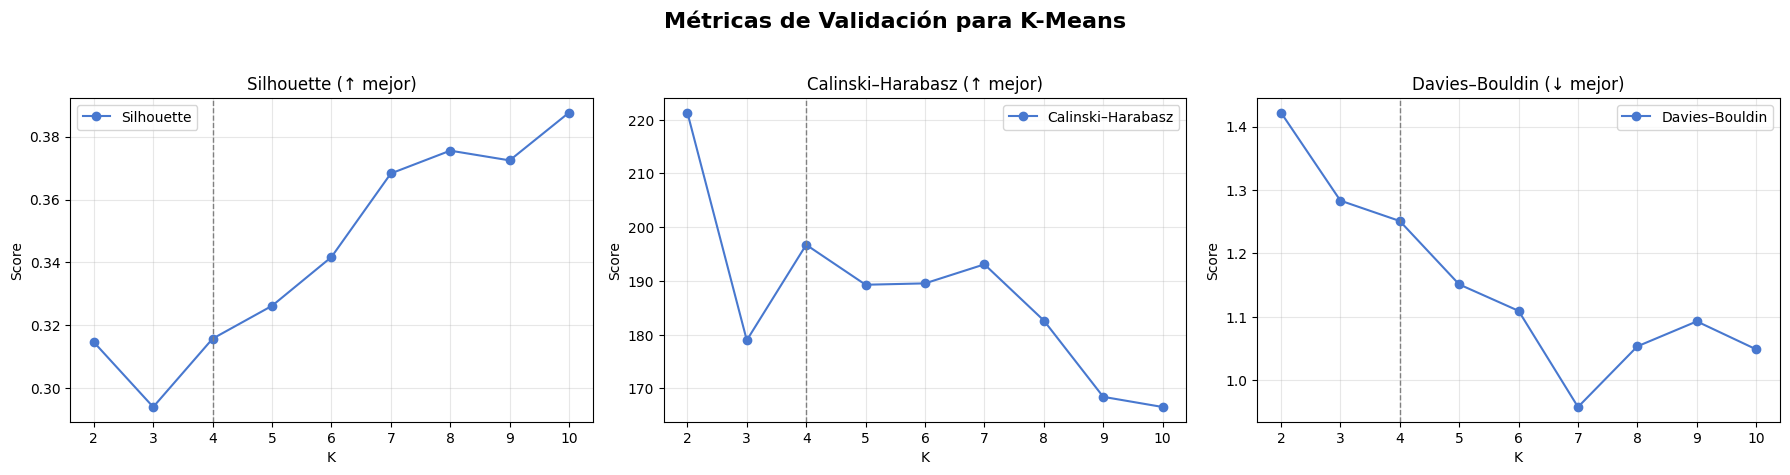

Silhouette @K=4: 0.316
Calinski–Harabasz @K=4: 196.726
Davies–Bouldin @K=4: 1.251


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# --- Configuración ---
K_range = range(2, 11)   # Silhouette no está definido para K=1
random_state = 42

sil_vals, ch_vals, db_vals = [], [], []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=random_state)
    labels = km.fit_predict(X_scaled)          # X_scaled: tus datos estandarizados
    sil_vals.append(silhouette_score(X_scaled, labels))
    ch_vals.append(calinski_harabasz_score(X_scaled, labels))
    db_vals.append(davies_bouldin_score(X_scaled, labels))

# --- Gráficos: 1 fila x 3 columnas ---
fig, axes = plt.subplots(1, 3, figsize=(18, 4.8))
fig.suptitle('Métricas de Validación para K-Means', fontsize=16, fontweight='bold')

# Silhouette (↑ mejor)
axes[0].plot(list(K_range), sil_vals, 'o-', label='Silhouette')
axes[0].axvline(4, color='gray', linestyle='--', linewidth=1)
axes[0].set_title('Silhouette (↑ mejor)')
axes[0].set_xlabel('K'); axes[0].set_ylabel('Score')
axes[0].set_xticks(list(K_range))
axes[0].grid(alpha=0.3); axes[0].legend()

# Calinski–Harabasz (↑ mejor)
axes[1].plot(list(K_range), ch_vals, 'o-', label='Calinski–Harabasz')
axes[1].axvline(4, color='gray', linestyle='--', linewidth=1)
axes[1].set_title('Calinski–Harabasz (↑ mejor)')
axes[1].set_xlabel('K'); axes[1].set_ylabel('Score')
axes[1].set_xticks(list(K_range))
axes[1].grid(alpha=0.3); axes[1].legend()

# Davies–Bouldin (↓ mejor)
axes[2].plot(list(K_range), db_vals, 'o-', label='Davies–Bouldin')
axes[2].axvline(4, color='gray', linestyle='--', linewidth=1)
axes[2].set_title('Davies–Bouldin (↓ mejor)')
axes[2].set_xlabel('K'); axes[2].set_ylabel('Score')
axes[2].set_xticks(list(K_range))
axes[2].grid(alpha=0.3); axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Reporte numérico en K=4
k_index = list(K_range).index(4)
print(f"Silhouette @K=4: {sil_vals[k_index]:.3f}")
print(f"Calinski–Harabasz @K=4: {ch_vals[k_index]:.3f}")
print(f"Davies–Bouldin @K=4: {db_vals[k_index]:.3f}")


## RESULTADO

Se agruparon los clientes en **cuatro grupos** según las similitudes que presentan en sus datos.  
Cada punto del gráfico representa un cliente, y los colores muestran a qué grupo pertenece.  
Los símbolos rojos indican el centro de cada grupo, donde se concentran los clientes con características más parecidas entre sí.


El resumen de los grupos permite observar diferencias importantes entre los clientes.  
El **Cluster 0** reúne a clientes con ingresos medios, límites de crédito altos y mayor tiempo como clientes, lo que refleja una relación consolidada con la institución.  
El **Cluster 1** está formado por clientes nuevos, con límites de crédito bajos y poca antigüedad.  
El **Cluster 2** incluye clientes con límites de crédito altos y una fuerte presencia del segundo tipo de crédito y del producto ofrecido.  
Finalmente, el **Cluster 3** agrupa a clientes con los ingresos más altos, pero con menor tiempo en la institución y límites de crédito más moderados.

El análisis de las métricas de validación muestra que, aunque los valores de Silhouette y Davies–Bouldin siguen mejorando con K mayores, 
el punto K = 4 ofrece un equilibrio adecuado entre cohesión, separación e interpretabilidad de los grupos. 
Además, coincide con el punto de inflexión observado en el método del codo, por lo que se considera un número óptimo de clusters para este conjunto de datos.


### Aplicación de Modelo entrenado sobre nuevos 50 nuevo registros

In [29]:
import os
import requests
import pandas as pd
import base64
from io import StringIO
from dotenv import load_dotenv

# 1️⃣ Cargar las variables desde .env
load_dotenv()

# 2️⃣ Leer tu token de entorno
token = os.getenv("GITHUB_TOKEN")

# 3️⃣ Definir la URL de tu archivo (usando la API de GitHub)
url = "https://api.github.com/repos/apachecob/datascience/contents/new_costumer.csv"

# 4️⃣ Solicitar el archivo con autenticación
headers = {"Authorization": f"token {token}"}
response = requests.get(url, headers=headers)
response.raise_for_status()

# 5️⃣ Decodificar el contenido base64
content = base64.b64decode(response.json()["content"]).decode("utf-8")

# 6️⃣ Convertir a DataFrame
df2 = pd.read_csv(StringIO(content))
df2.head()


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


Se agrega la columna "Tipo_de_cliente" en este nuevo dataset

In [32]:
df2['Tipo_de_cliente'].value_counts()

Tipo_de_cliente
1    14
0    14
2    11
3    11
Name: count, dtype: int64

Al agregar nuevas columnas (como 'Tipo_de_cliente'), se genera un error porque el modelo espera exactamente las mismas columnas con las que fue entrenado originalmente. Por ello, se eliminan las columnas adicionales y se reordena el DataFrame para conservar solo las variables utilizadas durante el entrenamiento.


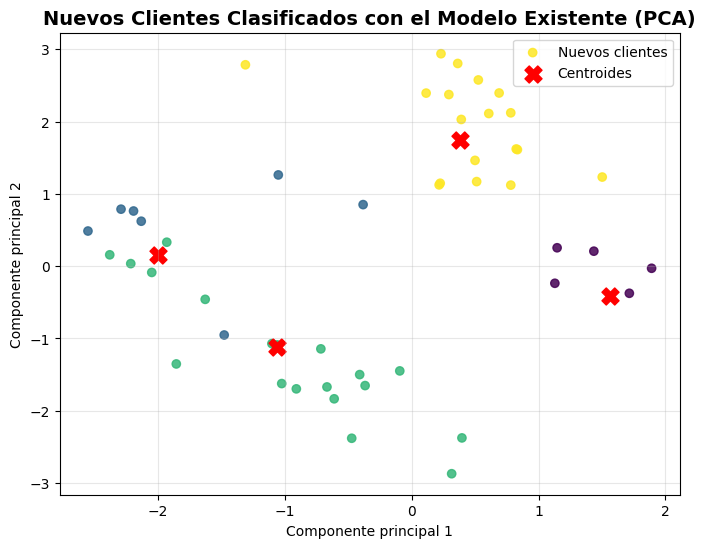

cluster
2    20
3    18
1     7
0     5
Name: Nuevos por cluster, dtype: int64

In [ ]:
# === 1) Columnas usadas en el entrenamiento ===
feature_cols = ['Salario','Credito_tipo_1','Credito_tipo_2','Limite_TC','Tiempo_cliente','Producto_ofrecido']

# === 2) Quitar columnas extra y asegurar mismo orden ===
df2 = df2.drop(columns=['Tipo_de_cliente'], errors='ignore')
df2 = df2.reindex(columns=feature_cols)

# === 3) Tipos numéricos + imputación con medias del set original ===
for c in feature_cols:
    df2[c] = pd.to_numeric(df2[c], errors='coerce')

train_means = df[feature_cols].mean()   # df = dataset original usado para entrenar
df2 = df2.fillna(train_means)

# === 4) Mismo scaler y mismo modelo (no reentrenar) ===
X_df2_scaled = scaler.transform(df2[feature_cols])
df2['cluster'] = kmeans.predict(X_df2_scaled)

# === 5) Proyección al mismo PCA y gráfico SOLO con los nuevos ===
X_df2_pca = pca.transform(X_df2_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_df2_pca[:,0], X_df2_pca[:,1],
            c=df2['cluster'], cmap='viridis', alpha=0.85, label='Nuevos clientes')
plt.scatter(centroides_pca[:,0], centroides_pca[:,1],
            c='red', marker='X', s=150, label='Centroides')
plt.title('Nuevos Clientes Clasificados con el Modelo Existente (PCA)', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1'); plt.ylabel('Componente principal 2')
plt.legend(); plt.grid(alpha=0.3); plt.show()

# (Opcional) Resumen rápido de estos 50 clientes por cluster
display(df2['cluster'].value_counts().rename('Nuevos por cluster'))



## Aplicación del modelo a nuevos clientes

El modelo previamente entrenado se aplicó a un conjunto adicional de **50 nuevos clientes**, utilizando exactamente los mismos parámetros y proceso de estandarización empleados en la fase inicial.  
De esta forma, se aseguró la **consistencia en la clasificación** y la **comparabilidad con los grupos originales**.

Los resultados muestran la siguiente distribución de los nuevos clientes entre los clusters existentes:

- **Cluster 2:** 20 clientes  
- **Cluster 3:** 18 clientes  
- **Cluster 1:** 7 clientes  
- **Cluster 0:** 5 clientes  

La mayoría de los nuevos clientes fueron asignados a los **Clusters 2 y 3**, lo que sugiere una tendencia hacia perfiles con **menor antigüedad y límites de crédito moderados**, así como hacia **clientes con ingresos más altos y preferencia por créditos del tipo 1**.  
Esta distribución confirma que los nuevos registros presentan características similares a los segmentos más activos de la base actual, lo que demuestra la **robustez y estabilidad del modelo sin necesidad de reentrenamiento**.

